### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.
### Metric
Submissions are evaluated on `Root-Mean-Squared-Error (RMSE)` between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)
### Submission File Format
Please do not change the format of the test file while submissions. Just fill up the price columns without touching any other data on the file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline

### About the data

1. Features
    - Area_type – describes the area
    - Availability – when it can be possessed or when it is ready(categorical and time-series)
    - Location – where it is located in Bengaluru
    - Price – Value of the property in lakhs(INR)
    - Size – in BHK or Bedroom (1-10 or more)
    - Society – to which society it belongs
    - Total_sqft – size of the property in sq.ft
    - Bath – No. of bathrooms
    - Balcony – No. of the balcony


In [2]:
train = pd.read_csv('data/Predicting-House-Prices-In-Bengaluru-Train-Data.csv')
test = pd.read_csv('data/Predicting-House-Prices-In-Bengaluru-Test-Data.csv')

print("Data shapes:{tr} training obs and {ts} test obs.\nNo. of features: {f}"
      .format(tr=train.shape[0], ts=test.shape[0], f=train.shape[1]))

Data shapes:13320 training obs and 1480 test obs.
No. of features: 9


In [3]:
train.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
test.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
5,Plot Area,Ready To Move,5th Phase JP Nagar,4 Bedroom,NaN,760,3.0,1.0,NaN
6,Built-up Area,Ready To Move,Vijayanagar,4 Bedroom,NaN,4500,4.0,1.0,NaN
7,Built-up Area,Ready To Move,BEML Layout,2 BHK,G aceer,960,2.0,0.0,NaN
8,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Soitya,1569,3.0,1.0,NaN
9,Built-up Area,Ready To Move,NRI Layout,3 BHK,NaN,2400,4.0,NaN,NaN


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
area_type       1480 non-null object
availability    1480 non-null object
location        1480 non-null object
size            1478 non-null object
society         854 non-null object
total_sqft      1480 non-null object
bath            1473 non-null float64
balcony         1411 non-null float64
price           0 non-null float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [7]:
for col in train.select_dtypes(include=['object']).columns:
    print("\n" + col)
    print(train[col].unique().tolist())
    print("\n\n")


area_type
['Super built-up  Area', 'Plot  Area', 'Built-up  Area', 'Carpet  Area']




availability
['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec', '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb', '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar', '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', 'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr', '16-Jan', '14-Jul']




location
['Electronic City Phase II', 'Chikka Tirupathi', 'Utta

In [8]:
for col in train.select_dtypes(include=['object']).columns:
    print(train[col].value_counts())
    print("\n\n")

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64



Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
17-Jan               1
16-Oct               1
15-Dec               1
16-Jul               1
15-Aug               1
Name: availability, Length: 81, dtype: int64



Whitefield                540
Sarjapur  Road            399
Electronic City           302
Kanakpura Road            273
Thanisandra               234
                         ... 
Hanuman Nagar               1
Tharabanahalli              1
Vikram Nagar                1
Banashankari 2nd Stage      1
1Kasavanhalli               1
Name: location, Length: 1305, dtype: int64



2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 B

### Data cleanup
1. `availability` is a mix of dates (~ 2800 obs) and `Ready To Move`. An option would be to replace dates as `Not Ready`.
2. `size` has inconsistent category levels which can be combined to make fewer levels. (eg: 4 Bedroom and 4 BHK). Extract the numeric portion of `size`.
3. `balcony` has quite a few missing entries, which could be imputed by filling in a mean/median value
4. `society` has far too many NaNs (~ 4500 obs), dropping this feature would be a good idea.
5. Extract numberic portion from `total_sqft`.

In [9]:
# 1. Fixing the levels of `availability` feature.

train['availability'] = train['availability'].apply(lambda x: 'Not Ready' if x != 'Ready To Move' else x)
test['availability'] = test['availability'].apply(lambda x: 'Not Ready' if x != 'Ready To Move' else x)

In [10]:
train.availability.value_counts()

Ready To Move    10581
Not Ready         2739
Name: availability, dtype: int64

In [11]:
train.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [12]:
# 2. Create `bedrooms` feature from `size`.

train['size'] = train['size'].str.split(expand=True)[0]
test['size'] = test['size'].str.split(expand=True)[0]

# Before converting size as a numeric, we must remove the NaNs.

train.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,Not Ready,Old Airport Road,4,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6,NaN,1020,6.0,NaN,370.00


In [13]:
# 3. Impute `balcony`, `bath` and `bedrooms` feature with constant 2.0 for all the missing values.

imputer = SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value=2.0)

In [14]:
train['balcony'] = imputer.fit_transform(train['balcony'].values.reshape(-1,1))
train['bath'] = imputer.fit_transform(train['bath'].values.reshape(-1,1))
train['size'] = imputer.fit_transform(train['size'].values.reshape(-1,1))

train.head(4)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00


In [15]:
test['balcony'] = imputer.transform(test['balcony'].values.reshape(-1,1))
test['bath'] = imputer.transform(test['bath'].values.reshape(-1,1))
test['size'] = imputer.transform(test['size'].values.reshape(-1,1))

test.head(4)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9,NaN,2400,9.0,2.0,NaN
2,Plot Area,Not Ready,Hennur Road,4,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3,Winerri,1322,3.0,1.0,NaN


In [16]:
train['size'] = train['size'].astype('float32')
test['size'] = test['size'].astype('float32')

#### Few finishing touches to the raw data

- Filling missing `location` value suitably. One-off
- Extract the numeric part of `total_sqft` feature

In [17]:
train[train['location'].isnull() == True]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3.0,Grare S,1600,3.0,2.0,86.0


In [18]:
# Checking location for obs with `society` as "Grare S" to replace the NaN location
train[train['society'] == 'Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3.0,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3.0,Grare S,1600,3.0,2.0,77.0


In [19]:
train['location'].fillna(value='Anantapura', inplace=True)

In [20]:
# 5. Extract the numeric part of `total_sqft` from the dataset.

train['total_sqft'] = train.total_sqft.str.extract('(\d+)', expand=True)[0]
test['total_sqft'] = test.total_sqft.str.extract('(\d+)', expand=True)[0]

train['total_sqft'] = train['total_sqft'].astype('float32')
test['total_sqft'] = test['total_sqft'].astype('float32')

In [21]:
train.head(4)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00


In [22]:
# 4 - Drop `society`
# First let's take a copy of the dataset and continue working.

X_train = train.copy()
y_train = pd.DataFrame(train['price'], columns=['price'])
X_train.drop(['society', 'price'], axis=1, inplace=True)

X_train.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1056.0,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0
5,Super built-up Area,Ready To Move,Whitefield,2.0,1170.0,2.0,1.0
6,Super built-up Area,Not Ready,Old Airport Road,4.0,2732.0,4.0,2.0
7,Super built-up Area,Ready To Move,Rajaji Nagar,4.0,3300.0,4.0,2.0
8,Super built-up Area,Ready To Move,Marathahalli,3.0,1310.0,3.0,1.0
9,Plot Area,Ready To Move,Gandhi Bazar,6.0,1020.0,6.0,2.0


In [23]:
print(X_train.shape, y_train.shape)

(13320, 7) (13320, 1)


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null float32
total_sqft      13320 non-null float32
bath            13320 non-null float64
balcony         13320 non-null float64
dtypes: float32(2), float64(2), object(3)
memory usage: 624.5+ KB


In [25]:
X_test = test.copy()

X_test.drop(['society', 'price'], axis=1, inplace=True)

X_test.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony
0,Super built-up Area,Ready To Move,Brookefield,2.0,1225.0,2.0,2.0
1,Plot Area,Ready To Move,Akshaya Nagar,9.0,2400.0,9.0,2.0
2,Plot Area,Not Ready,Hennur Road,4.0,1650.0,5.0,2.0
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3.0,1322.0,3.0,1.0
4,Super built-up Area,Ready To Move,Konanakunte,2.0,1161.0,2.0,1.0
5,Plot Area,Ready To Move,5th Phase JP Nagar,4.0,760.0,3.0,1.0
6,Built-up Area,Ready To Move,Vijayanagar,4.0,4500.0,4.0,1.0
7,Built-up Area,Ready To Move,BEML Layout,2.0,960.0,2.0,0.0
8,Super built-up Area,Ready To Move,Thanisandra,3.0,1569.0,3.0,1.0
9,Built-up Area,Ready To Move,NRI Layout,3.0,2400.0,4.0,2.0


In [26]:
print(X_test.shape)
X_test.info()

(1480, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 7 columns):
area_type       1480 non-null object
availability    1480 non-null object
location        1480 non-null object
size            1480 non-null float32
total_sqft      1480 non-null float32
bath            1480 non-null float64
balcony         1480 non-null float64
dtypes: float32(2), float64(2), object(3)
memory usage: 69.5+ KB


### Progress so far...

- [x] Data cleanup
- [ ] EDA
- [ ] Data preprocessing
- [ ] Modelling & Evaluation
- [ ] Submission


### EDA

Hereafter, we'll be working on `X_train` and `X_test` data only. We'll leave the actual data alone!

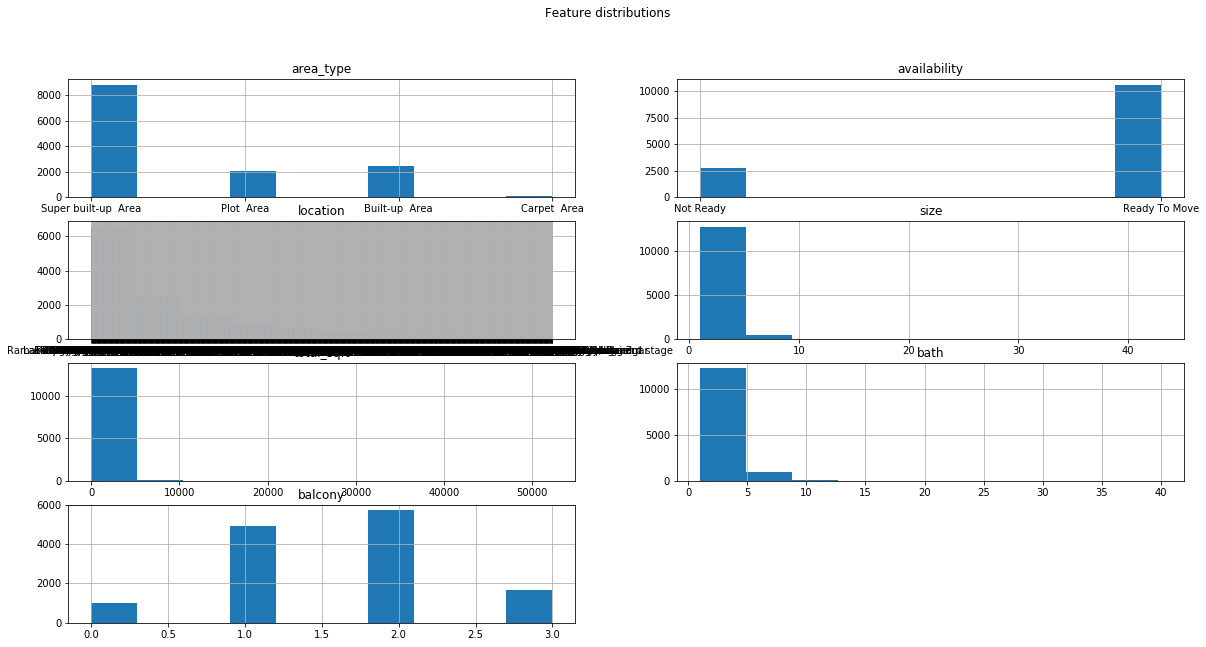

In [27]:
plt.figure(figsize=(20,10))
plt.suptitle("Feature distributions", fontsize=12)
for i, col in enumerate(X_train.columns):
    
    plt.subplot(4,2,i+1)
    plt.title(col)
    X_train[col].hist()
    

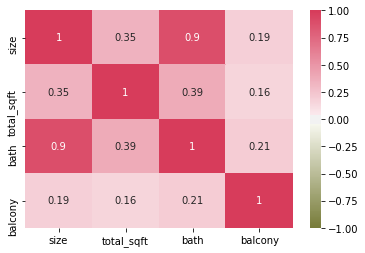

In [28]:
# Correlations between predictors

cmap = sns.diverging_palette(90,5, as_cmap=True)
sns.heatmap(X_train.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)

In [29]:
# Correlation of predictors with response - ??

X_train.corrwith(y_train['price'], axis=0)

size          0.398074
total_sqft    0.573243
bath          0.454449
balcony       0.124951
dtype: float64

#### Some observations

- Among the numeric predictors, `bath` and `size` are highly correlated (positive) and slighly (positively) correlated with `total_sqft`. This makes sense, because `size` represents whether the property is a 2 BHK / 1 RK, etc. Therefore, a 2 BHK would be having 2 bathrooms usually

- The correlation of each of the numeric predictors with the response variable also seems to be positive (`corrwith` needs to be verified for `axis=0` or `axis=1` ?)

~~Therefore, we can drop `size` to avoid multicollinearity. (Why `size` ? - Because `bath` has a slightly higher correlation with the response).~~

In [30]:
# X_train.drop('size', axis=1, inplace=True)
# X_test.drop('size', axis=1, inplace=True)

In [31]:
X_train.head(4)

,area_type,availability,location,size,total_sqft,bath,balcony
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1056.0,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0


In [32]:
X_test.head(4)

,area_type,availability,location,size,total_sqft,bath,balcony
0,Super built-up Area,Ready To Move,Brookefield,2.0,1225.0,2.0,2.0
1,Plot Area,Ready To Move,Akshaya Nagar,9.0,2400.0,9.0,2.0
2,Plot Area,Not Ready,Hennur Road,4.0,1650.0,5.0,2.0
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3.0,1322.0,3.0,1.0


### Progress so far...

- [x] Data cleanup
- [x] EDA
- [ ] Data preprocessing
- [ ] Modelling & Evaluation
- [ ] Submission


### Preprocessing

- Reduce levels for the `location` attribute by combining all those locations with frequency less than `25` as `Others`
- Now, use pandas' `get_dummies()` to binarize the categorical features **having same levels**

In [33]:
X_train['area_type'] = X_train['area_type'].str.strip()
X_train['area_type'] = X_train['area_type'].str.lower()

X_test['area_type'] = X_test['area_type'].str.strip()
X_test['area_type'] = X_test['area_type'].str.lower()

In [34]:
X_train.area_type.unique()

array(['super built-up  area', 'plot  area', 'built-up  area',
       'carpet  area'], dtype=object)

In [35]:
X_test.area_type.unique() == X_train.area_type.unique()

array([ True,  True,  True,  True])

In [36]:
X_test.availability.unique()

array(['Ready To Move', 'Not Ready'], dtype=object)

In [37]:
# Applying OneHot encoding on `area_type`

X_train = pd.get_dummies(X_train, columns=['area_type', 'availability'])
X_test = pd.get_dummies(X_test, columns=['area_type', 'availability'])

In [38]:
X_train.head(4)

,location,size,total_sqft,bath,balcony,area_type_built-up area,area_type_carpet area,area_type_plot area,area_type_super built-up area,availability_Not Ready,availability_Ready To Move
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,0,0,0,1,1,0
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,0,0,1,0,0,1
2,Uttarahalli,3.0,1440.0,2.0,3.0,1,0,0,0,0,1
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,0,0,0,1,0,1


You can't do the same with `location` because the levels might be different in train and test data.
This would result in varying number of columns. Therefore, let's go for `LabelEncoder` for `locations` and see how it helps.

While going for `LabelEncoder`, we need to be careful about the levels again. Because the encoder assigns numbers to various classes. This means, we should assign the class numbers consistently to both train and test data. For this reason, it's better to combine the dataset for encoding and then separate them once done.

In [39]:
infrequent_locations = X_train[X_train['location'].map(X_train['location'].value_counts() < 25)].location.values.tolist()

In [40]:
X_train.loc[X_train['location'].isin(infrequent_locations), 'location'] = 'Others'

In [41]:
X_test.loc[X_test['location'].isin(infrequent_locations), 'location'] = 'Others'

In [42]:
combined_train_test_data = pd.concat([X_train, X_test], ignore_index=True)
print(X_train.shape, X_test.shape, combined_train_test_data.shape)
combined_train_test_data.tail(7)

(13320, 11) (1480, 11) (14800, 11)


,location,size,total_sqft,bath,balcony,area_type_built-up area,area_type_carpet area,area_type_plot area,area_type_super built-up area,availability_Not Ready,availability_Ready To Move
14793,Others,4.0,6750.0,8.0,2.0,0,0,1,0,0,1
14794,Others,4.0,4250.0,4.0,2.0,0,0,0,1,0,1
14795,Vittasandra,2.0,1246.0,2.0,1.0,0,0,0,1,0,1
14796,Gottigere,3.0,1660.0,3.0,2.0,0,0,0,1,0,1
14797,Channasandra,2.0,1216.0,2.0,2.0,0,0,0,1,0,1
14798,Tumkur Road,2.0,996.0,2.0,1.0,1,0,0,0,1,0
14799,7th Phase JP Nagar,2.0,1150.0,2.0,2.0,1,0,0,0,0,1


In [43]:
encoder = LabelEncoder()

combined_train_test_data['location'] = encoder.fit_transform(combined_train_test_data.location.values)

In [44]:
train_indexes = range(0, X_train.shape[0])
test_indexes = range(X_train.shape[0], combined_train_test_data.shape[0])

In [45]:
X_train_transformed = combined_train_test_data.loc[train_indexes]
X_test_transformed = combined_train_test_data.loc[test_indexes]

print(X_train_transformed.shape, X_test_transformed.shape)

(13320, 11) (1480, 11)


In [46]:
X_train_transformed.head(3)

,location,size,total_sqft,bath,balcony,area_type_built-up area,area_type_carpet area,area_type_plot area,area_type_super built-up area,availability_Not Ready,availability_Ready To Move
0,48,2.0,1056.0,2.0,1.0,0,0,0,1,1,0
1,122,4.0,2600.0,5.0,3.0,0,0,1,0,0,1
2,155,3.0,1440.0,2.0,3.0,1,0,0,0,0,1


In [47]:
# scaler = MinMaxScaler()

# X_train_transformed_scaled = pd.DataFrame(scaler.fit_transform(X_train_transformed))
# X_test_transformed_scaled = pd.DataFrame(scaler.fit_transform(X_test_transformed))

# X_train_transformed_scaled.columns = X_train_transformed.columns.copy()
# X_test_transformed_scaled.columns = X_test_transformed.columns.copy()

### Progress so far...

- [x] Data cleanup
- [x] EDA
- [x] Data preprocessing
- [ ] Modelling & Evaluation
- [ ] Submission



### Modelling & Eval.

In [48]:
param_grid = {"svr":{'kernel':['linear','rbf'], 'C':[0.1, 0.5, 1.0, 5.0, 10.0]},"rf":{'n_estimators':[100,200,300, 400], 'max_depth':[2]}}

In [49]:
gridsearch = GridSearchCV(RandomForestRegressor(), param_grid=param_grid['rf'], scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

In [50]:
gridsearch.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.7s finished
/home/saileshg/sailspace/dev/py3mlenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:741: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [51]:
model = gridsearch.best_estimator_

In [52]:
y_pred = model.predict(X_train_transformed)

In [53]:
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(rmse)

103.20384469212368


In [54]:
y_pred = gridsearch.predict(X_test_transformed)

In [55]:
test.drop(['price'], axis=1, inplace=True)
test['price'] = y_pred

test = test.round(2)
test.head(4)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2.0,Roeekbl,1225.0,2.0,2.0,61.13
1,Plot Area,Ready To Move,Akshaya Nagar,9.0,NaN,2400.0,9.0,2.0,308.66
2,Plot Area,Not Ready,Hennur Road,4.0,Saandtt,1650.0,5.0,2.0,118.45
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3.0,Winerri,1322.0,3.0,1.0,118.45


### Progress so far...

- [x] Data cleanup
- [x] EDA
- [x] Data preprocessing
- [x] Modelling & Evaluation
- [ ] Submission


### Submission

In [56]:
test.to_csv('data/submission.csv', sep='\t', index=False)

In [57]:
# !pip install openpyxl
test.to_excel('data/submission.xlsx', index=False)